In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']
SEED=42

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=SEED)

x_train.shape, x_test.shape

((5966, 11), (2557, 11))

In [9]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

In [10]:
x_train_c=x_train.copy()

In [11]:
x_train_c.shape

(5966, 11)

In [12]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
num_data=x_train_c.select_dtypes(exclude=['object'])

In [14]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


C:\Users\91862\AppData\Local\Temp\ipykernel_29132\3396610498.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


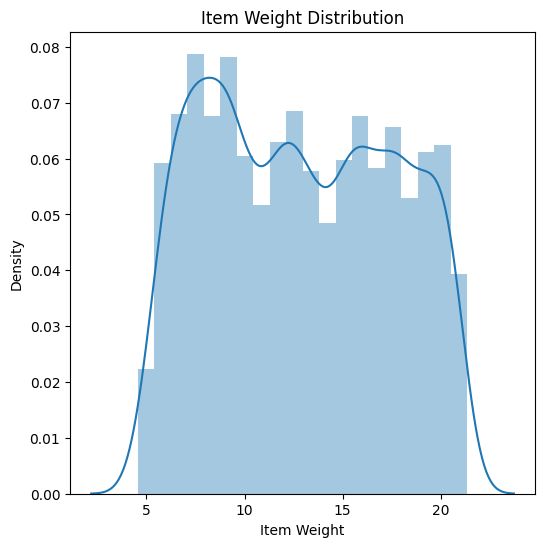

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.show()

C:\Users\91862\AppData\Local\Temp\ipykernel_29132\2788055443.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


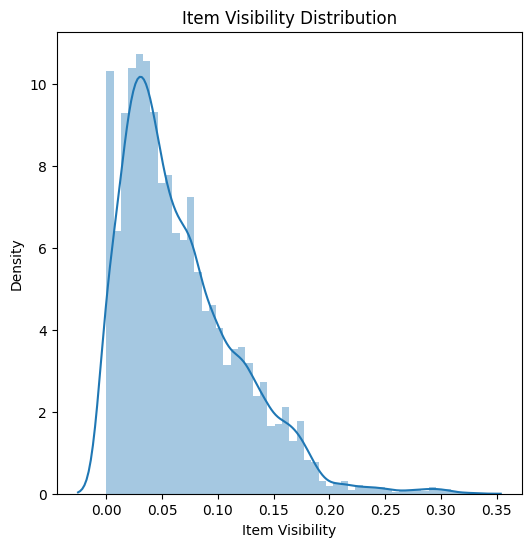

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.title('Item Visibility Distribution')
plt.xlabel('Item Visibility')
plt.ylabel('Density')
plt.show()

C:\Users\91862\AppData\Local\Temp\ipykernel_29132\232025800.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


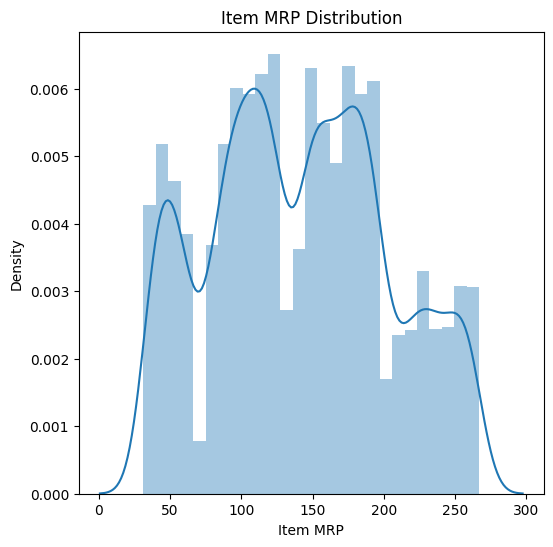

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.title('Item MRP Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Density')
plt.show()

C:\Users\91862\AppData\Local\Temp\ipykernel_29132\1801649635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


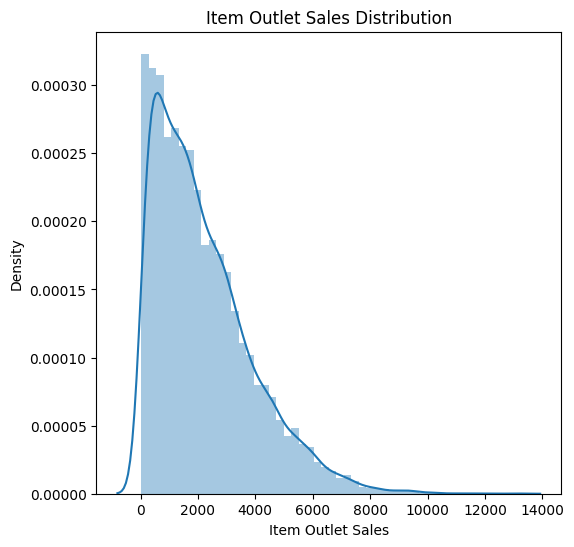

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.show()

In [19]:
def visualize(dataframe,col_name):
    fig,ax= plt.subplots(1,2, figsize=(12,5))

    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

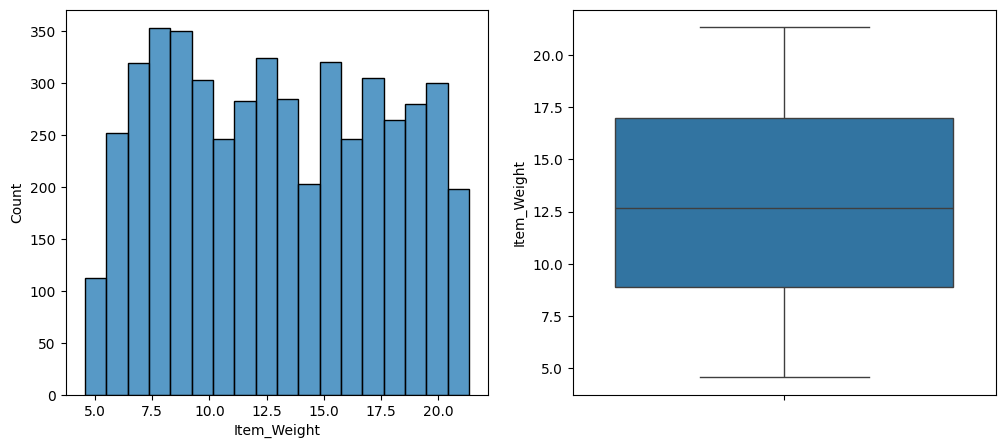

In [20]:
visualize(num_data,'Item_Weight')

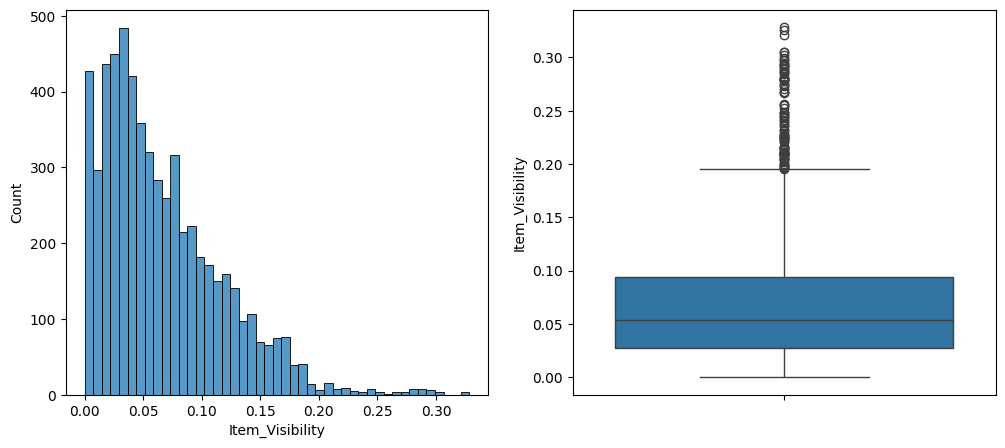

In [21]:
visualize(num_data,'Item_Visibility')

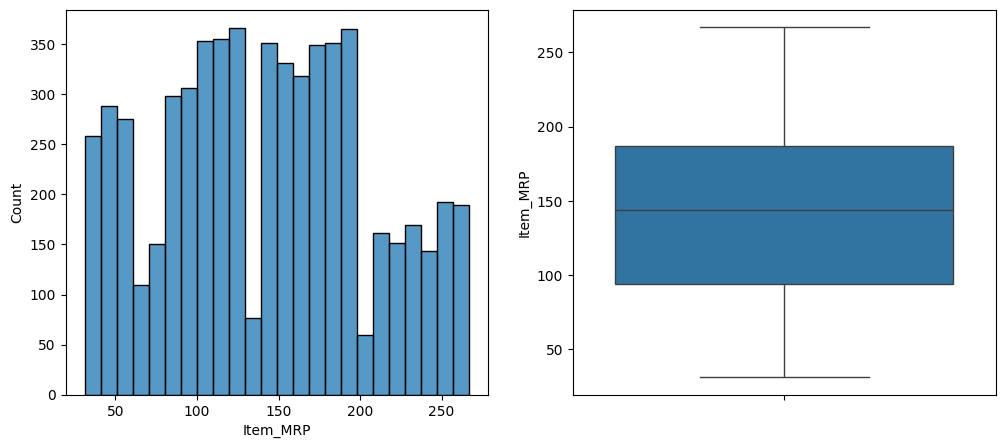

In [22]:
visualize(num_data,'Item_MRP')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

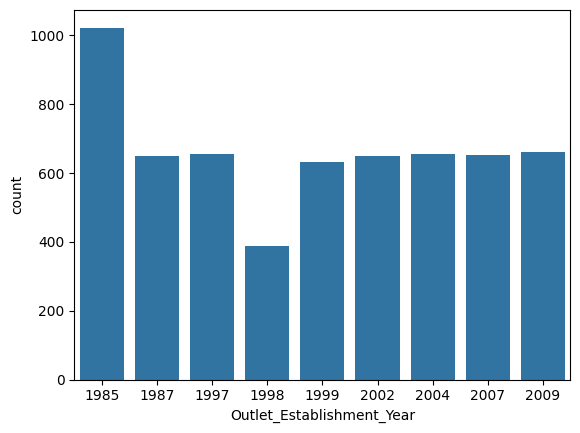

In [23]:
sns.countplot(data=x_train_c, x='Outlet_Establishment_Year')

In [25]:
cat_data=x_train_c.select_dtypes(include=['object'])
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [26]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [27]:
cat_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [28]:
cat_data['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [29]:
cat_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [30]:
cat_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [31]:
cat_data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [32]:
cat_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

In [33]:
cat_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [34]:
cat_data['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [50]:
# FEATURE ENGINEERING AND DATA WRANGLING

In [51]:
x_train_c['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [52]:
def create_item_type(dataframe):
    dataframe['Item_Type']=dataframe['Item_Identifier'].str[:2]
    dataframe['Item_Type']=dataframe['Item_Type'].map({
        'FD': 'Food',
        'NC': 'Non Consumable',
        'DR': 'Drink'
    })
    return dataframe

In [53]:
x_train_c=create_item_type(x_train_c)
x_train_c.shape

(5966, 11)

In [54]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [55]:
# Checking if the missing value's key has another value, if yes fill it with that value

In [56]:
item_id_weight_pivot= x_train_c.pivot_table(values=['Item_Weight'], index='Item_Identifier').reset_index()
item_id_weight_dct=dict(zip(item_id_weight_pivot['Item_Identifier'],item_id_weight_pivot['Item_Weight']))

In [57]:
# If it still doesn't work, we can take the median to fill the value up.

In [58]:
item_type_weight_pivot=x_train_c.pivot_table(values='Item_Weight', index='Item_Type', aggfunc='median').reset_index()
item_type_weight_dct=dict(zip(item_type_weight_pivot['Item_Type'],item_type_weight_pivot['Item_Weight']))
item_type_weight_dct

{'Drink': 11.8, 'Food': 12.8, 'Non Consumable': 13.05}

In [59]:
def impute_item_weight(dataframe):
    dataframe.loc[:,'Item_Weight']=dataframe.loc[:,'Item_Weight'].fillna(dataframe.loc[:,'Item_Identifier'].map(item_id_weight_dct))
    dataframe.loc[:,'Item_Weight']=dataframe.loc[:,'Item_Weight'].fillna(dataframe.loc[:, 'Item_Type'].map(item_type_weight_dct))
    return dataframe

In [60]:
x_train_c=impute_item_weight(x_train_c)
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [61]:
x_train_c.groupby(['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [62]:
x_train_c.loc[x_train_c['Outlet_Type']=='Grocery Store','Outlet_Size'].value_counts()
x_train_c.shape

(5966, 11)

In [63]:
from scipy.stats import mode

outlet_type_size_pivot=x_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=lambda x: mode(x).mode[0] ).reset_index()
outlet_type_size_dct=dict(zip(outlet_type_size_pivot['Outlet_Type'], outlet_type_size_pivot['Outlet_Size']))
outlet_type_size_dct

C:\Users\91862\AppData\Local\Temp\ipykernel_29132\606025804.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  outlet_type_size_pivot=x_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=lambda x: mode(x).mode[0] ).reset_index()
C:\Users\91862\AppData\Local\Temp\ipykernel_29132\606025804.py:3: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  outlet_type_size_pivot=x_train_c.pivot_table(values='Outlet_Size', index

{'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [64]:
def impute_outlet_size(dataframe):
    dataframe.loc[:,'Outlet_Size']=dataframe.loc[:,'Outlet_Size'].fillna(dataframe.loc[:,'Outlet_Type'].map(outlet_type_size_dct))
    dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)
    return dataframe

In [65]:
x_train_c=impute_outlet_size(x_train_c)

C:\Users\91862\AppData\Local\Temp\ipykernel_29132\3912291814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)


In [66]:
x_train_c.isnull().sum()
x_train_c.shape

(5966, 11)

In [67]:
x_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [68]:
def standardize(dataframe):
    dataframe['Item_Fat_Content']=dataframe['Item_Fat_Content'].replace({
        'Low Fat': 'Low_Fat',
        'Regular':'Regular',
        'LF': 'Low_Fat',
        'low fat': 'Low_Fat',
        'reg': 'Regular'
    })
    return dataframe

In [69]:
x_train_c=standardize(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

In [70]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non Consumable  Low_Fat             1137
dtype: int64

In [71]:
def correct_item(dataframe):
    dataframe.loc[dataframe['Item_Type']=='Non Consumable','Item_Fat_Content']='Non_Edible'
    return dataframe

In [72]:
x_train_c=correct_item(x_train_c)
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non Consumable  Non_Edible          1137
dtype: int64

In [73]:
# Prepare Dataset for ML

In [74]:
def prepare_dataset(dataframe):
    dataframe=create_item_type(dataframe)
    dataframe=impute_item_weight(dataframe)
    dataframe=impute_outlet_size(dataframe)
    dataframe=standardize(dataframe)
    dataframe=correct_item(dataframe)
    return dataframe

In [75]:
x_train=prepare_dataset(x_train)
x_train.isnull().sum()
x_train.shape

C:\Users\91862\AppData\Local\Temp\ipykernel_29132\3912291814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)


(5966, 11)

In [76]:
print(x_test.shape)
x_test=prepare_dataset(x_test)
x_test.isnull().sum()
x_test.dtypes

(2557, 11)


C:\Users\91862\AppData\Local\Temp\ipykernel_29132\3912291814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[dataframe['Outlet_Type']=='Grocery Store'].fillna('Small',inplace=True)


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [77]:
cat_feats=x_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [78]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [79]:
ohe_features=ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_features

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [80]:
num_types=x_train.select_dtypes(exclude='object').reset_index()
num_types.head()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1921,7.72,0.147904,116.6466,1998
1,655,19.75,0.014301,103.0332,1997
2,2229,8.60,0.054221,129.1310,1985
3,2537,19.35,0.118342,222.6088,2002
4,3528,18.35,0.092150,184.8266,1987


In [81]:
cat_feats_train=x_train.select_dtypes(include='object')
x_train_cat=pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_features)
x_train_cat.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [82]:
x_train_f=pd.concat([num_types,x_train_cat],axis=1)
x_train_f=x_train_f.drop(['index'],axis=1)

final_col=x_train_f.columns.values
final_col

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [83]:
#For the test data
num_test=x_test.select_dtypes(exclude='object').reset_index()
cat_test=x_test.select_dtypes(include='object')
x_test_ohe=pd.DataFrame(ohe.transform(cat_test).toarray(), columns=ohe_features)
x_test_f=pd.concat([num_test, x_test_ohe],axis=1)
x_test_f=x_test_f.drop('index',axis=1)
x_test_f=x_test_f[final_col]
x_test_f.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [84]:
x_train_f.shape

(5966, 1574)

In [87]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [88]:
def model_call(model_name,x_train, y_train,x_test, y_test,name):
    dct={}
    
    model=model_name
    model.fit(x_train,y_train)
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    train_r2= round(r2_score(y_train_pred, y_train),4)
    test_r2=round(r2_score(y_test_pred, y_test),4)
        
    train_mse=round(mean_squared_error(y_train_pred, y_train),4)
    test_mse=round(mean_squared_error(y_test_pred, y_test),4)
    
    train_mae=round(mean_absolute_error(y_train_pred, y_train),4)
    test_mae=round(mean_absolute_error(y_test_pred, y_test),4)
    
    dct[name]=[train_r2, test_r2, train_mae, test_mae, train_mse, test_mse]
    
    return dct

In [91]:
linear=model_call(LinearRegression(), x_train_f, y_train, x_test_f, y_test,'Lin Reg')
ran_for=model_call(RandomForestRegressor(), x_train_f, y_train, x_test_f, y_test,'Random Forest')
grad_boost=model_call(GradientBoostingRegressor(), x_train_f, y_train, x_test_f, y_test, 'Gradient Boosting')
hist_grad=model_call(HistGradientBoostingRegressor(), x_train_f, y_train, x_test_f, y_test,'Hist Grad')
xg_boost=model_call(xgb.XGBRegressor(), x_train_f, y_train, x_test_f, y_test, 'XGBoost')

In [92]:
import lightgbm as lgbm

In [93]:
lg_model=model_call(lgbm.LGBMRegressor(), x_train_f, y_train, x_test_f, y_test,'LGBM')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 31
[LightGBM] [Info] Start training from score 2204.882521


In [94]:
dct=dict(linear)
dct.update(ran_for)
dct.update(grad_boost)
dct.update(hist_grad)
dct.update(xg_boost)
dct.update(lg_model)

In [95]:
df2=pd.DataFrame(dct)

In [96]:
df2=df2.T
df2.columns=['Train R2', 'Test R2','Train MAE', 'Test MAE', 'Train MSE', 'Test MSE']

In [97]:
df2

,Train R2,Test R2,Train MAE,Test MAE,Train MSE,Test MSE
Lin Reg,0.5143,-0.0075,741.3098,1.412348e+11,9.778686e+05,1.476280e+24
Random Forest,0.9177,0.3771,299.8351,7.766990e+02,1.873208e+05,1.248692e+06
Gradient Boosting,0.3654,0.3307,736.6064,7.467826e+02,1.059566e+06,1.137575e+06
Hist Grad,0.5899,0.3983,636.9442,7.525357e+02,7.790622e+05,1.178607e+06
XGBoost,0.5610,0.3583,652.9593,7.641052e+02,8.124243e+05,1.207511e+06
LGBM,0.5856,0.4056,639.4872,7.495395e+02,7.875716e+05,1.168375e+06


In [98]:
df2.drop(['Lin Reg'], axis=0, inplace=True)
df2

,Train R2,Test R2,Train MAE,Test MAE,Train MSE,Test MSE
Random Forest,0.9177,0.3771,299.8351,776.6990,1.873208e+05,1.248692e+06
Gradient Boosting,0.3654,0.3307,736.6064,746.7826,1.059566e+06,1.137575e+06
Hist Grad,0.5899,0.3983,636.9442,752.5357,7.790622e+05,1.178607e+06
XGBoost,0.5610,0.3583,652.9593,764.1052,8.124243e+05,1.207511e+06
LGBM,0.5856,0.4056,639.4872,749.5395,7.875716e+05,1.168375e+06


In [99]:
r2=df2[['Train R2', 'Test R2']]
r2

,Train R2,Test R2
Random Forest,0.9177,0.3771
Gradient Boosting,0.3654,0.3307
Hist Grad,0.5899,0.3983
XGBoost,0.5610,0.3583
LGBM,0.5856,0.4056


<Axes: >

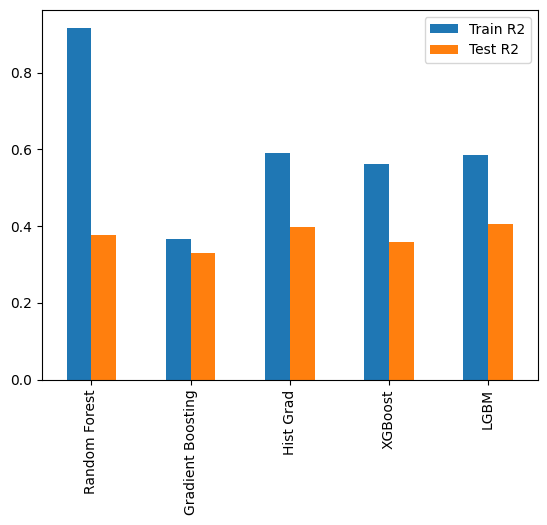

In [100]:
r2.plot(kind='bar')

<Axes: >

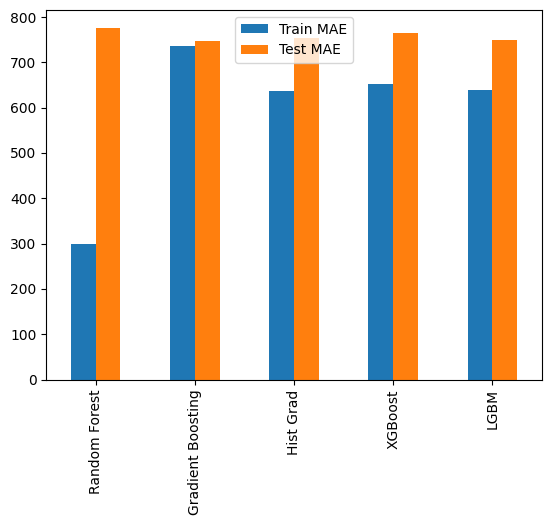

In [101]:
mae=df2[['Train MAE', 'Test MAE']]
mae.plot(kind='bar')

<Axes: >

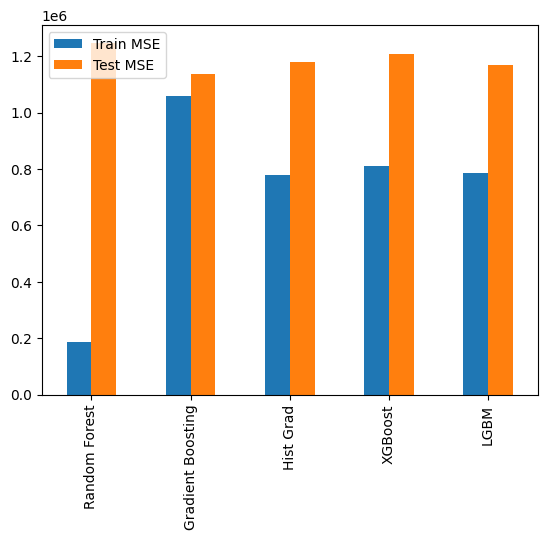

In [102]:
mse=df2[['Train MSE', 'Test MSE']]
mse.plot(kind='bar')